In [58]:
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.stats as stats

## Q1: Linear Congruential Random Number Generator

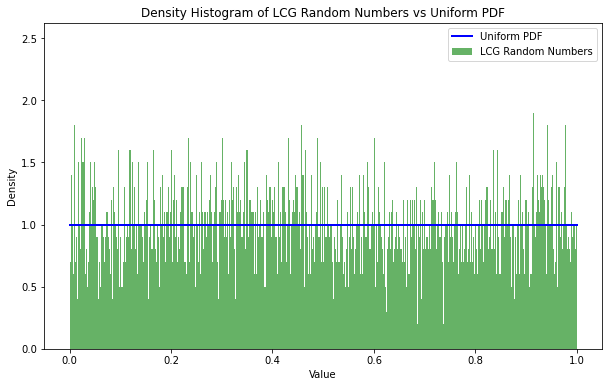

In [15]:
# Require Parameters for the LCG
a = 1103515245
c = 12345
m = 2**31
seed = 42

def LCG(a, c, m, seed, size):
    numbers = np.zeros(size)
    numbers[0] = seed
    for i in range(1, size):
        numbers[i] = (a * numbers[i-1] + c) % m
    return numbers / m

# Generate 10,000 random numbers
num_random_numbers = 10000
random_numbers = LCG(a, c, m, seed, num_random_numbers)

# Plot the density histogram
plt.figure(figsize=(10, 6))
plt.hist(random_numbers, bins=1000, density=True, alpha=0.6, color='g', label='LCG Random Numbers')

# Plot the uniform PDF
x = np.linspace(0, 1, 100)
plt.plot(x, [1]*len(x), 'b-', lw=2, label='Uniform PDF')
plt.title('Density Histogram of LCG Random Numbers vs Uniform PDF')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

## Q2: Library Function np.random.rand()

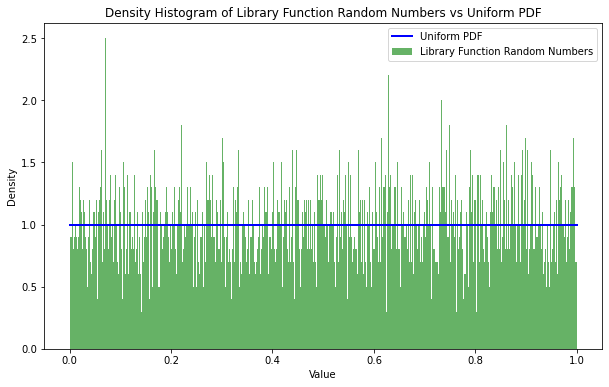

In [16]:
# Generate 10,000 random numbers uniformly distributed between 0 and 1
num_random_numbers = 10000
random_numbers = np.random.rand(num_random_numbers)

# Plot the density histogram
plt.figure(figsize=(10, 6))
plt.hist(random_numbers, bins=1000, density=True, alpha=0.6, color='g', label='Library Function Random Numbers')

# Plot the uniform PDF
x = np.linspace(0, 1, 100)
plt.plot(x, [1]*len(x), 'b-', lw=2, label='Uniform PDF')
plt.title('Density Histogram of Library Function Random Numbers vs Uniform PDF')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()


## Q3 : Time elapse 

In [18]:
#Using Linear Congruential Random Number Generator
# Require Parameters for the LCG
a = 1103515245
c = 12345
m = 2**31
seed = 42

def LCG(a, c, m, seed, size):
    numbers = np.zeros(size)
    numbers[0] = seed
    for i in range(1, size):
        numbers[i] = (a * numbers[i-1] + c) % m
    return numbers / m

# Generate 10,000 random numbers
num_random_numbers = 10000

# Measure the start time
start_time1 = time.time()

random_numbers = LCG(a, c, m, seed, num_random_numbers)

# Measure the end time
end_time1 = time.time()

# Calculate the elapsed time
elapsed_time1 = end_time1 - start_time1


#Using np.random.rand()

# Generate 10,000 random numbers uniformly distributed between 0 and 1
num_random_numbers = 10000

# Measure the start time
start_time2 = time.time()

random_numbers = np.random.rand(num_random_numbers)

# Measure the end time
end_time2 = time.time()

# Calculate the elapsed time
elapsed_time2 = end_time2 - start_time2

print("Time taken to produce 10,000 uniform deviates:")
print("-----------------------------------------------")
print("LCG           :",elapsed_time1," sec.")
print("random.rand() :",elapsed_time2," sec.")

Time taken to produce 10,000 uniform deviates:
-----------------------------------------------
LCG           : 0.021563053131103516  sec.
random.rand() : 0.0009174346923828125  sec.


## Q5: Box-Muller Method

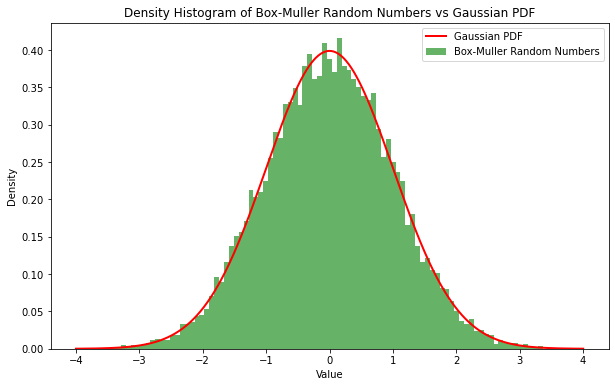

In [49]:
def Box_Muller_Transform(x1, x2):
    y1 = np.sqrt(-2.0 * np.log(x1)) * np.cos(2.0 * np.pi * x2)
    y2 = np.sqrt(-2.0 * np.log(x1)) * np.sin(2.0 * np.pi * x2)
    return y1, y2

# Generate 10,000 random numbers uniformly distributed between 0 and 1
num_random_numbers = 10000
x1 = np.random.rand(num_random_numbers)
x2 = np.random.rand(num_random_numbers)

# Apply the Box-Muller Transform
y1, y2 = Box_Muller_Transform(x1, x2)

# Combine the two sets of numbers to get 10,000 Gaussian-distributed numbers
gaussian_random_numbers = np.concatenate((y1,y2))

# Plot the density histogram
plt.figure(figsize=(10, 6))
plt.hist(gaussian_random_numbers, bins=100, density=True, alpha=0.6, color='g', label='Box-Muller Random Numbers')

# Plot the Gaussian PDF
x = np.linspace(-4, 4, 1000)
gaussian_pdf = stats.norm.pdf(x)
plt.plot(x, gaussian_pdf, 'r-', lw=2, label='Gaussian PDF')
plt.title('Density Histogram of Box-Muller Random Numbers vs Gaussian PDF')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()

## Q6 : Rejection Method

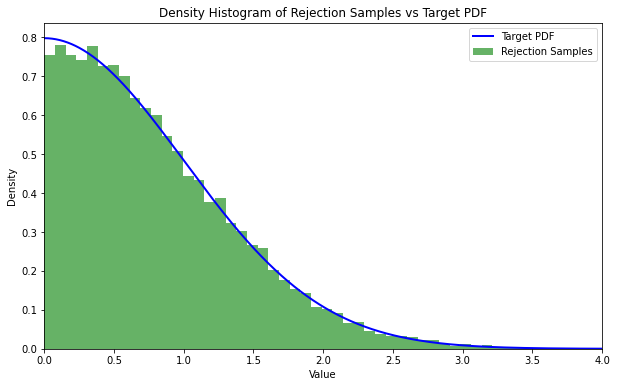

In [95]:
# Define the target distribution f(x)
def f(x):
    return (np.sqrt(2 / np.pi)) * np.exp(-x**2 / 2)

sample=[]
sample_size=100000
for i in range(sample_size):
    x=np.random.rand()*4
    y=np.random.rand()
    if(y<=f(x)):
        sample.append(x)

# Plot the density histogram
plt.figure(figsize=(10, 6))
plt.hist(sample, bins=50, density=True, alpha=0.6, color='g', label='Rejection Samples')

# Plot the target PDF
x = np.linspace(0, 4, 1000)
target_pdf = f(x)
plt.plot(x, target_pdf, 'b-', lw=2, label='Target PDF')
plt.title('Density Histogram of Rejection Samples vs Target PDF')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.xlim(0,4)
plt.show()


## Q7: $x^2$ test

In [109]:
import numpy as np
from scipy.stats import chi2

# Observed counts
observed_counts_1 = np.array([ 4, 10, 10, 13, 20, 18, 18, 11, 13, 14,13])
observed_counts_2 = np.array([3, 7, 11, 15, 19, 24, 21, 17, 13, 9, 5])
observed_counts_total = observed_counts_1 + observed_counts_2

# Total number of rolls
total_rolls_1 = np.sum(observed_counts_1)
total_rolls_2 = np.sum(observed_counts_2)

# Expected probabilities for each score from 2 to 12
expected_probs = np.array([1/36, 2/36, 3/36, 4/36, 5/36, 6/36, 5/36, 4/36, 3/36, 2/36, 1/36])

# Expected counts
expected_counts_1 = total_rolls_1 * expected_probs
expected_counts_2 = total_rolls_2 * expected_probs

# Chi-squared statistic
chi_squared_stat_1 = np.sum((observed_counts_1 - expected_counts_1)**2 / expected_counts_1)
chi_squared_stat_2 = np.sum((observed_counts_2 - expected_counts_2)**2 / expected_counts_2)

# Degrees of freedom
degrees_of_freedom = len(expected_probs) - 1

# Determine if the null hypothesis can be rejected
def labeling_random_number(chi_squared_stat):
    if chi_squared_stat > chi2.ppf(0.95, degrees_of_freedom):
        print("The random numbers are 'not sufficiently random'.")
    elif chi_squared_stat > chi2.ppf(0.90, degrees_of_freedom):
        print("The random numbers are 'suspect'.")
    elif chi_squared_stat > chi2.ppf(0.75, degrees_of_freedom):
        print("The random numbers are 'almost suspect'.")
    else:
        print("The random numbers are 'sufficiently random'.")

# Print results
print("Chi-squared statistic for Observed counts 1:  ",chi_squared_stat_1)
labeling_random_number(chi_squared_stat_1)
print("------------------------------------------------")
print("Chi-squared statistic for Observed counts 2:  ",chi_squared_stat_2)
labeling_random_number(chi_squared_stat_2)


Chi-squared statistic for Observed counts 1:   29.491666666666667
The random numbers are 'not sufficiently random'.
------------------------------------------------
Chi-squared statistic for Observed counts 2:   1.1416666666666666
The random numbers are 'sufficiently random'.


## Q8 : Monte Carlo Integration

In [118]:
def monte_carlo_integration_sphere(dimension, num_samples):
    # Generate random points within the bounding hypercube [-1, 1]^dimension
    points = np.random.uniform(-1, 1, (num_samples, dimension))

    # Check if the points are inside the unit sphere
    inside_sphere = np.sum(points**2, axis=1) <= 1

    # Estimate the volume of the sphere
    volume_estimate = (2**dimension) * np.sum(inside_sphere) / num_samples
    return volume_estimate

# Dimension and number of random samples
dimension = 10
num_samples = 1000000
estimated_volume = monte_carlo_integration_sphere(dimension, num_samples)
print(f"Estimated volume of the {dimension}-dimensional unit sphere: {estimated_volume}")


Estimated volume of the 10-dimensional unit sphere: 2.628608


## Q9: Metropolish Algorithm

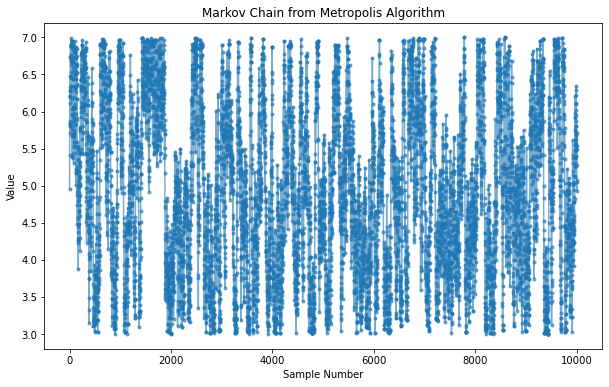

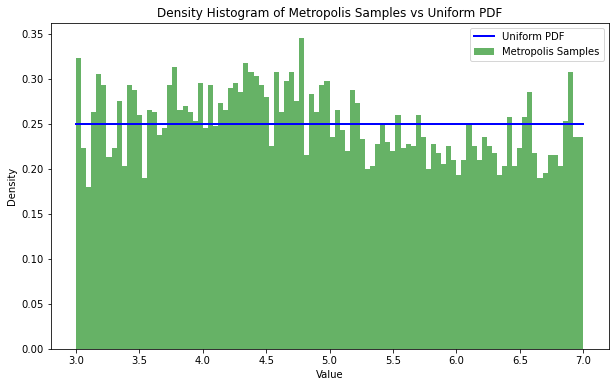

In [126]:
# Metropolis algorithm to sample from a uniform distribution on (3, 7)
def metropolis_uniform(num_samples, initial_x, proposal_width):
    samples = []
    current_x = initial_x

    for _ in range(num_samples):
        # Propose a new point
        proposed_x = current_x + np.random.uniform(-proposal_width, proposal_width)
        
        # Calculate the acceptance probability
        if 3 < proposed_x < 7:
            acceptance_prob = 1  # Since the distribution is uniform and zero elsewhere
        else:
            acceptance_prob = 0
        
        # Accept or reject the new point
        if np.random.rand() < acceptance_prob:
            current_x = proposed_x
        
        # Append the current point to the samples
        samples.append(current_x)
    
    return np.array(samples)

# Parameters
num_samples = 10000
initial_x = 5.0
proposal_width = 0.5

# Generate samples using the Metropolis algorithm
samples = metropolis_uniform(num_samples, initial_x, proposal_width)

# Plot the Markov Chain
plt.figure(figsize=(10, 6))
plt.plot(samples, marker='.', linestyle='-', alpha=0.6)
plt.title('Markov Chain from Metropolis Algorithm')
plt.xlabel('Sample Number')
plt.ylabel('Value')
plt.show()

# Plot the density histogram of the samples
plt.figure(figsize=(10, 6))
plt.hist(samples, bins=100, density=True, alpha=0.6, color='g', label='Metropolis Samples')

# Plot the true uniform distribution
x = np.linspace(3, 7, 100)
uniform_pdf = np.ones_like(x) / (7 - 3)
plt.plot(x, uniform_pdf, 'b-', lw=2, label='Uniform PDF')
plt.title('Density Histogram of Metropolis Samples vs Uniform PDF')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()


## Q10: Bayesian Probabilistc inteference using MCMC

100%|█████████████████████████████████████████████████████████████████████████████| 4000/4000 [00:11<00:00, 360.27it/s]


Shape of samples: (13000, 3)


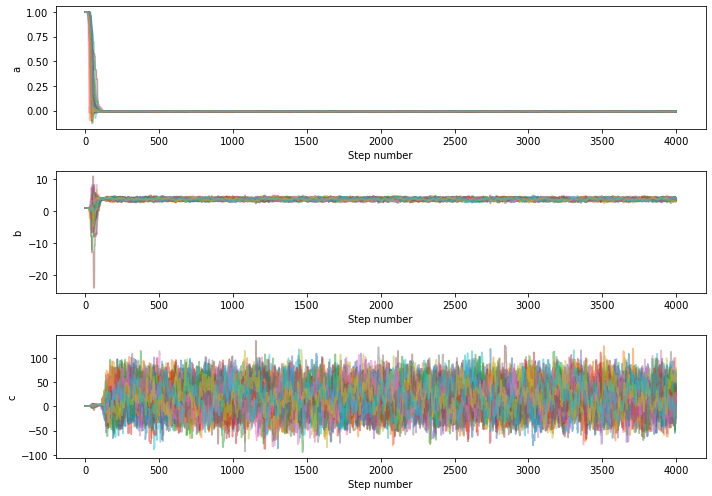

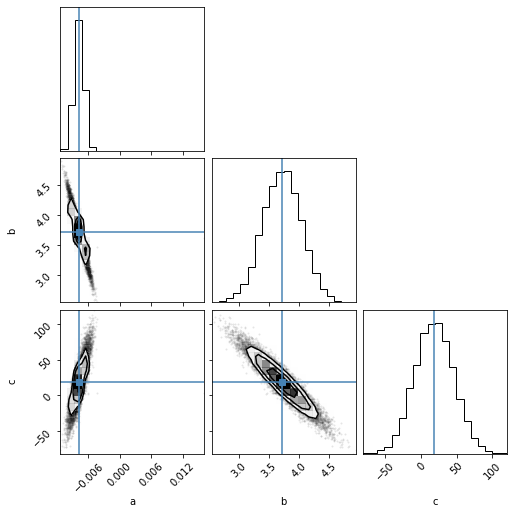

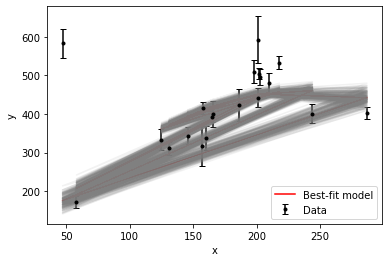

Best-fit values (medians): [-7.81494753e-03  3.72063209e+00  1.82486574e+01]


In [124]:
import numpy as np
import matplotlib.pyplot as plt
import emcee
import corner

# Load the data
data1=np.loadtxt("Data_A4_CP_Q10.txt")
data = np.array([
    [1, 201, 592, 61],
    [2, 244, 401, 25],
    [3, 47, 583, 38],
    [4, 287, 402, 15],
    [5, 203, 495, 21],
    [6, 58, 173, 15],
    [7, 210, 479, 27],
    [8, 202, 504, 14],
    [9, 198, 510, 30],
    [10, 158, 416, 16],
    [11, 165, 393, 14],
    [12, 201, 442, 25],
    [13, 157, 317, 52],
    [14, 131, 311, 16],
    [15, 166, 400, 34],
    [16, 160, 337, 31],
    [17, 186, 423, 42],
    [18, 125, 334, 26],
    [19, 218, 533, 16],
    [20, 146, 344, 22]])

# Extract x, y, and sigma
x = data[:, 1]
y = data[:, 2]
sigma = data[:, 3]

# Define the model: y = a*x^2 + b*x + c
def model(theta, x):
    a, b, c = theta
    return a * x**2 + b * x + c

# Define the log likelihood function
def log_likelihood(theta, x, y, sigma):
    model_y = model(theta, x)
    return -0.5 * np.sum(((y - model_y) / sigma) ** 2)

# Define the log prior function
def log_prior(theta):
    a, b, c = theta
    if -1000 < a < 1000 and -1000 < b < 1000 and -1000 < c < 1000:
        return 0.0
    return -np.inf

# Define the log probability function
def log_probability(theta, x, y, sigma):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y, sigma)

# Set up the MCMC sampler
nwalkers = 50
ndim = 3
nsteps = 4000
initial = np.array([1.0, 1.0, 1.0])
pos = initial + 1e-4 * np.random.randn(nwalkers, ndim)

# Initialize the sampler
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(x, y, sigma))

# Run the MCMC chains
sampler.run_mcmc(pos, nsteps, progress=True)

# Get the samples
samples = sampler.get_chain(discard=100, thin=15, flat=True)

# Ensure samples are 2D
print("Shape of samples:", samples.shape)

# Compute the quantiles
quantiles = np.percentile(samples, [16, 50, 84], axis=0)
medians = quantiles[1]
one_sigma = np.diff(quantiles, axis=0)
# Plot all chains
plt.figure(figsize=(10, 7))
for i in range(ndim):
    plt.subplot(3, 1, i+1)
    for walker in range(nwalkers):
        plt.plot(sampler.chain[walker, :, i], alpha=0.5)
    plt.xlabel("Step number")
    plt.ylabel(["a", "b", "c"][i])
plt.tight_layout()
plt.show()

# Use corner library to make a plot showing the joint and marginalised posterior PDFs
corner_fig = corner.corner(samples, labels=["a", "b", "c"], truths=medians)
plt.show()

# Plot the data with the best-fit model and 200 models randomly chosen from the posterior
plt.errorbar(x, y, yerr=sigma, fmt=".k", capsize=3, label="Data")

# Best-fit model
best_fit = model(medians, x)
plt.plot(x, best_fit, label="Best-fit model", color="red")
# 200 models from the posterior
inds = np.random.randint(len(samples), size=200)
for ind in inds:
    sample = samples[ind]
    plt.plot(x, model(sample, x), color="gray", alpha=0.1)

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()

# Results
print("Best-fit values (medians):", medians)
#print("One-sigma uncertainties:", one_sigma)
